In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········


TIMEOUT: ignored

In [0]:
!ls "/content/drive/My Drive/MLProject/Version2"


action_v2.ipynb  results  UCF101  v_ApplyEyeMakeup_g01_c01.avi


In [0]:
import numpy as np
import cv2
import os
from tqdm import tqdm
import argparse
import os

import json
from keras.models import load_model,model_from_json
import numpy as np
from keras.datasets import cifar10
from keras.layers import (Activation, Conv3D, Dense, Dropout, Flatten,
                          MaxPooling3D)
from keras.layers.advanced_activations import LeakyReLU
from keras.losses import categorical_crossentropy
from keras.models import Sequential
from keras.optimizers import Adam
from keras.utils import np_utils
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
import matplotlib
#matplotlib.use('AGG')
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def video3d(filename):
        cap = cv2.VideoCapture(filename)
        nframe = cap.get(cv2.CAP_PROP_FRAME_COUNT)
        frames = [x * nframe / 15 for x in range(15)]
        #print(nframe)
        framearray = []

        for i in range(15):
            cap.set(cv2.CAP_PROP_POS_FRAMES, frames[i])
            ret, frame = cap.read()
            
            frame = cv2.resize(frame, (32,32))
            framearray.append(cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY))

        cap.release()
        return np.array(framearray)
#c=video3d('/content/drive/My Drive/ml/v_ApplyEyeMakeup_g01_c01.avi')
#print(c)

In [0]:
def get_UCF_classname(filename):
        return filename[filename.find('_') + 1:filename.find('_', 2)]


In [0]:
def loaddata(video_dir,nclass, result_dir):
    files = os.listdir(video_dir)
    X = []
    labels = []
    labellist = []

    #pbar = tqdm(total=len(files))
    for v in files:
        v1 = os.path.join(video_dir, v)
        vfiles=os.listdir(v1)
        for filename in vfiles:
          #pbar.update(1)
            if filename == '.DS_Store':
                continue
            name = os.path.join(v1, filename)
            #print(files)
            label = get_UCF_classname(filename)
            #print(label)
            if label not in labellist:
                if len(labellist) >= nclass:
                    continue
                labellist.append(label)
            labels.append(label)

            X.append(video3d(name))

      #pbar.close()
    with open(os.path.join(result_dir, 'classes.txt'), 'w') as fp:
        for i in range(len(labellist)):
            fp.write('{}\n'.format(labellist[i]))

    for num, label in enumerate(labellist):
        for i in range(len(labels)):
            if label == labels[i]:
              labels[i] = num
    #print(labels)
    #print(np.array(X).shape)
    #print(np.array(X).transpose((0, 2, 3, 1)).shape)
    return np.array(X).transpose((0, 2, 3, 1)), labels

#loaddata('/content/drive/My Drive/MLProject/Version2/UCF101',6,'/content/drive/My Drive/MLProject/Version2/results')
x,y=loaddata('/content/drive/My Drive/MLProject/Version2/UCF101',6,'/content/drive/My Drive/MLProject/Version2/results')

In [0]:
print(y)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 

In [0]:
noofclass=6
fname_npz = 'dataset_{}_{}.npz'.format(
        noofclass,15)#class,depth,skip
X = x.reshape((x.shape[0], 32, 32, 15, 1))
Y = np_utils.to_categorical(y, noofclass)
print(Y)
print(fname_npz)
X = X.astype('float32')
np.savez(fname_npz, X=X, Y=Y)
print('Saved dataset to dataset.npz.')
print('X_shape:{}\nY_shape:{}'.format(X.shape, Y.shape))
print(X.shape[1:])


[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1.]]
dataset_6_15.npz
Saved dataset to dataset.npz.
X_shape:(820, 32, 32, 15, 1)
Y_shape:(820, 6)
(32, 32, 15, 1)


In [0]:
model = Sequential()
model.add(Conv3D(32, kernel_size=(3, 3, 3), input_shape=(
    X.shape[1:]), border_mode='same'))
model.add(Activation('relu'))
model.add(Conv3D(32, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
model.add(Dropout(0.25))

model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('relu'))
model.add(Conv3D(64, kernel_size=(3, 3, 3), border_mode='same'))
model.add(Activation('softmax'))
model.add(MaxPooling3D(pool_size=(3, 3, 3), border_mode='same'))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(noofclass, activation='softmax'))
model.compile(loss=categorical_crossentropy,optimizer=Adam(), metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, kernel_size=(3, 3, 3), input_shape=(32, 32, 1..., padding="same")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(32, kernel_size=(3, 3, 3), padding="same")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `MaxPooling3D` call to the Keras 2 API: `MaxPooling3D(pool_size=(3, 3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv3D` call to the Keras 2 API: `Conv3D(64, kernel_size=(3, 3, 3), padding="same")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv3D` call to the 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 32, 32, 15, 32)    896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 15, 32)    0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 32, 32, 15, 32)    27680     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 15, 32)    0         
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 11, 11, 5, 32)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 5, 32)     0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 11, 11, 5, 64)     55360     
__________

In [0]:
#plot_model(model, show_shapes=True,to_file=os.path.join(args.output, 'model.png'))

In [0]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.5, random_state=43)


In [0]:
hist = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), batch_size=15,
                        epochs=500, verbose=1, shuffle=True)

Train on 410 samples, validate on 410 samples
Epoch 1/500
410/410 [==============================] - 9s 21ms/step - loss: 1.9990 - acc: 0.2024 - val_loss: 1.8135 - val_acc: 0.1683
Epoch 2/500
410/410 [==============================] - 3s 8ms/step - loss: 1.9805 - acc: 0.1902 - val_loss: 1.7981 - val_acc: 0.1732
Epoch 3/500
410/410 [==============================] - 4s 9ms/step - loss: 1.9198 - acc: 0.2585 - val_loss: 1.5443 - val_acc: 0.3220
Epoch 4/500
410/410 [==============================] - 4s 9ms/step - loss: 1.5461 - acc: 0.3878 - val_loss: 1.1667 - val_acc: 0.4902
Epoch 5/500
410/410 [==============================] - 4s 9ms/step - loss: 1.1877 - acc: 0.5366 - val_loss: 1.1658 - val_acc: 0.5317
Epoch 6/500
410/410 [==============================] - 4s 9ms/step - loss: 1.0544 - acc: 0.5878 - val_loss: 0.9365 - val_acc: 0.6268
Epoch 7/500
410/410 [==============================] - 3s 8ms/step - loss: 0.8542 - acc: 0.6610 - val_loss: 0.9709 - val_acc: 0.6098
Epoch 8/500
410/410 [=

In [0]:
  model.evaluate(X_test, Y_test, verbose=0)
  model_json = model.to_json()
  if not os.path.isdir('/content/drive/My Drive/MLProject/output1'):
      os.makedirs('/content/drive/My Drive/MLProject/output1')
  with open(os.path.join('/content/drive/My Drive/MLProject/output1', 'ucf101_3dcnnmodel_4.json'), 'w') as json_file:
      json_file.write(model_json)
  model.save_weights(os.path.join('/content/drive/My Drive/MLProject/output1', 'ucf101_3dcnnmodel_4.hd5'))
  
  print(X_test.shape)

  loss, acc = model.evaluate(X_test, Y_test, verbose=0)
  print('Test loss:', loss)
  print('Test acc: ',acc)

(410, 32, 32, 15, 1)
Test loss: 0.5654768339017543
Test acc:  0.8707317058633014


In [0]:
print('Test accuracy:', acc)

Test accuracy: 0.8707317058633014


In [2]:
with open('/content/drive/My Drive/MLProject/Version2/results/classes.txt', 'r') as f:
  class_names = f.readlines()
  f.close()

with open('/content/drive/My Drive/MLProject/output1/ucf101_3dcnnmodel_50_50_30_rgb.json', 'r') as f:
  model = model_from_json(f.read())
  
    
model.load_weights('/content/drive/My Drive/MLProject/output1/ucf101_3dcnnmodel_50_50_30_rgb.hd5', by_name=True)

out = cv2.VideoWriter('/content/drive/My Drive/MLProject/frames/video1.avi',cv2.VideoWriter_fourcc(*'XVID'), 15.0, (240,320))

# read video
video = '/content/drive/My Drive/MLProject/Version2/UCF101/IceDancing/v_IceDancing_g10_c07.avi'
cap = cv2.VideoCapture(video)
clip = []
while True:
    ret, frame = cap.read()
    if ret:
        tmp = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        tmp = cv2.resize(tmp, (50, 50))
        clip.append(tmp)
        #clip.append(cv2.resize(tmp, (32, 32)))
        #print(tmp.shape)
        out.write(frame)
        if len(clip) == 30:
            inputs = np.array(clip).astype(np.float32)
            inputs = np.expand_dims(inputs, axis=0)
            inputs = np.expand_dims(inputs, axis=0)
            #print(inputs.shape)
            #inputs = inputs.reshape((1, 32, 32, 15, 1))
            inputs = np.transpose(inputs, (0, 4,3,2,1))
            #print(inputs.shape)
            pred = model.predict(inputs)
            #print("predictions ,",pred)
            label = np.argmax(pred[0])
            #print(label)
            cv2.putText(frame, class_names[label].split(' ')[-1].strip(), (20, 20),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                        (255, 255, 255), 2)
            cv2.putText(frame, "prob: %.4f" % pred[0][label], (20, 40),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6,
                        (255, 255, 255), 2)
            
            fig = plt.figure()
            ax = fig.gca()
            ax.grid(False)
            plt.axis("off")
            plt.imshow(frame)
            plt.show()
            clip.pop(0)
            #plt.pause(0.05)
            cv2.waitKey(10)
    
    else:
        break

out.release()
cap.release()
cv2.destroyAllWindows()


FileNotFoundError: ignored

500
['seaborn-talk', 'seaborn', 'seaborn-muted', 'classic', 'seaborn-dark-palette', 'seaborn-notebook', 'seaborn-colorblind', 'seaborn-dark', 'dark_background', 'seaborn-paper', 'grayscale', 'seaborn-pastel', 'bmh', 'seaborn-white', 'fivethirtyeight', 'seaborn-darkgrid', 'seaborn-bright', 'seaborn-whitegrid', 'ggplot', 'seaborn-poster', 'seaborn-deep', 'Solarize_Light2', '_classic_test', 'seaborn-ticks', 'fast']


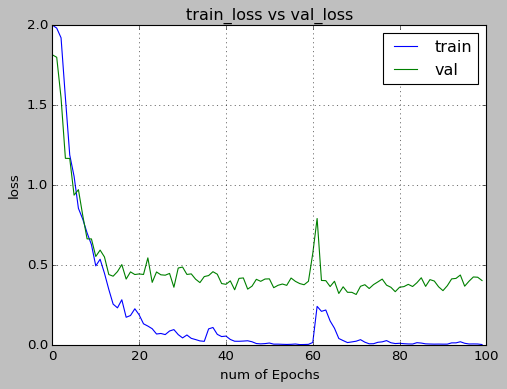

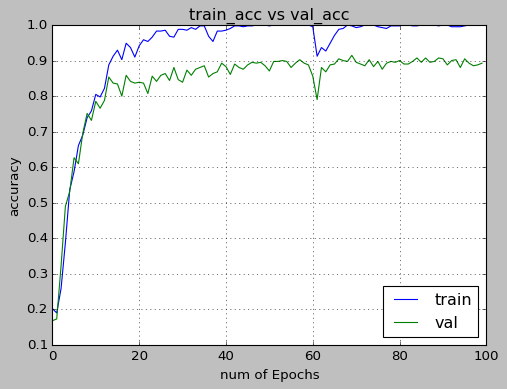

In [0]:
numEpochs = 100

train_loss=hist.history['loss']
print(len(train_loss))
train_loss = train_loss[0:numEpochs]
val_loss=hist.history['val_loss']
val_loss = val_loss[0:numEpochs]
train_acc=hist.history['acc']
train_acc = train_acc[0:numEpochs]
val_acc=hist.history['val_acc']
val_acc = val_acc[0:numEpochs]
xc=range(numEpochs)

plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
print (plt.style.available)
plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

plt.style.use(['classic'])

[[67  0  2  0  0  0]
 [ 1 57  2  2  8  0]
 [ 2  7 57  0  6  0]
 [ 0  3  3 57  0  5]
 [ 4  1  5  0 50  0]
 [ 0  0  0  2  0 69]]
Confusion matrix, without normalization
[[67  0  2  0  0  0]
 [ 1 57  2  2  8  0]
 [ 2  7 57  0  6  0]
 [ 0  3  3 57  0  5]
 [ 4  1  5  0 50  0]
 [ 0  0  0  2  0 69]]
Normalized confusion matrix
[[0.97 0.   0.03 0.   0.   0.  ]
 [0.01 0.81 0.03 0.03 0.11 0.  ]
 [0.03 0.1  0.79 0.   0.08 0.  ]
 [0.   0.04 0.04 0.84 0.   0.07]
 [0.07 0.02 0.08 0.   0.83 0.  ]
 [0.   0.   0.   0.03 0.   0.97]]


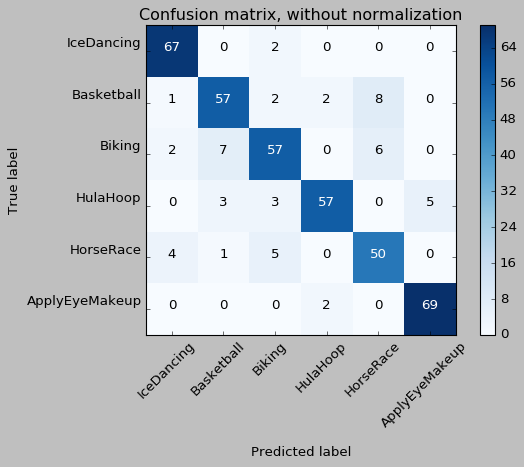

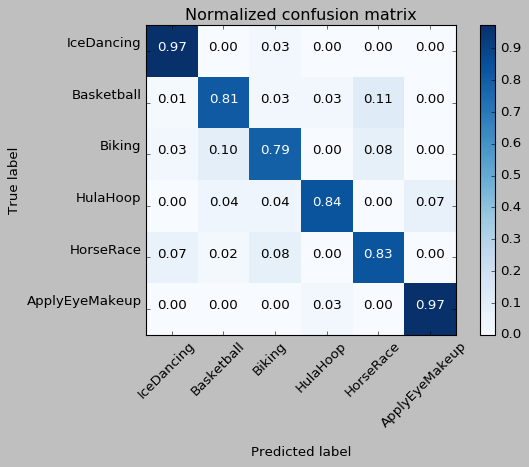

In [0]:
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools 

with open('/content/drive/My Drive/MLProject/Version2/results/classes.txt', 'r') as f:
  class_names = f.readlines()
  f.close()
y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(Y_test, axis=1)


  
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()


cnf_matrix = confusion_matrix(y_test, y_pred)

print(cnf_matrix)

np.set_printoptions(precision=2)


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,title='Confusion matrix, without normalization')


plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

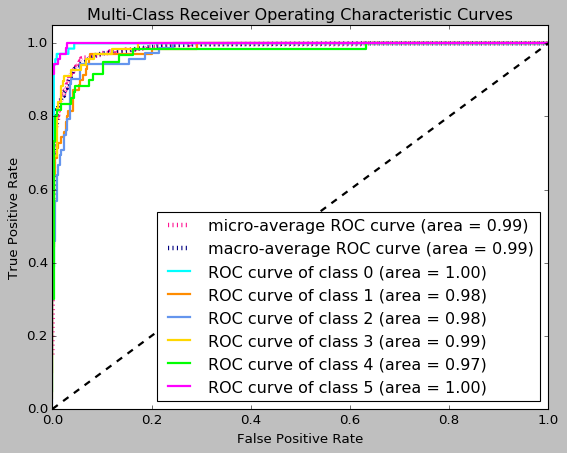

In [87]:
import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle
from sklearn.metrics import roc_curve, auc
n_classes = 6

lw = 2
y_prediction = model.predict(X_test)
y_test = Y_test


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_prediction[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_prediction.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])


mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue','gold','lime','fuchsia'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
#plt.xticks(np.arange(0.0,1.0, 0.4))
#plt.yticks(np.arange(0.0,1.0, 0.6))
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multi-Class Receiver Operating Characteristic Curves')
plt.legend(loc="lower right")
plt.show()


In [88]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)

y_pred = np.argmax(y_pred, axis=1)
y_test = np.argmax(Y_test, axis=1)

print(classification_report(y_test, y_pred, target_names=class_names))


                 precision    recall  f1-score   support

    IceDancing
       0.91      0.97      0.94        69
    Basketball
       0.84      0.81      0.83        70
        Biking
       0.83      0.79      0.81        72
      HulaHoop
       0.93      0.84      0.88        68
     HorseRace
       0.78      0.83      0.81        60
ApplyEyeMakeup
       0.93      0.97      0.95        71

    avg / total       0.87      0.87      0.87       410

